In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib

%load_ext sql
%sql sqlite:///Event.sqlite

The database is impoted and converted to a pandas dataframe, much better for data analysis in python and also better for exporting the data to numpy

In [2]:
cnx = sqlite3.connect(r'Event.sqlite')

# create the dataframe from a query
df = pd.read_sql_query("SELECT * FROM Event", cnx)

In [3]:
df

,ID,DateTimeEventTT,Satellite,Type1,Type2,Type3,Origin,DateTimeAdded
0,1,2020-01-01 15:17:59,1,OM,D,EXT,Thuillot,2020-12-13 12:52:55
1,2,2020-01-01 15:21:38,1,OM,D,INT,Thuillot,2020-12-13 12:52:55
2,3,2020-01-01 15:23:21,1,PA,D,EXT,Thuillot,2020-12-13 12:52:55
3,4,2020-01-01 15:27:01,1,PA,D,INT,Thuillot,2020-12-13 12:52:55
4,5,2020-01-01 17:32:48,1,OM,F,INT,Thuillot,2020-12-13 12:52:55
...,...,...,...,...,...,...,...,...
703314,757463,2015-12-31 12:57:30,2,PA,D,INT,Thuillot,2021-05-09 23:10:41
703315,757464,2015-12-31 13:18:28,2,OM,F,INT,Thuillot,2021-05-09 23:10:41
703316,757465,2015-12-31 13:22:24,2,OM,F,EXT,Thuillot,2021-05-09 23:10:41
703317,757466,2015-12-31 15:37:46,2,PA,F,INT,Thuillot,2021-05-09 23:10:41


In [4]:
df.Origin == 'PyMeeus'

0         False
1         False
2         False
3         False
4         False
          ...  
703314    False
703315    False
703316    False
703317    False
703318    False
Name: Origin, Length: 703319, dtype: bool

In [ ]:
sql_cmd = """

WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT, 
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="PyMeeus"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3, 
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime, 
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df = pd.read_sql_query(sql_cmd, cnx)

In [ ]:
df

In [ ]:
df['Type1'].unique()

In [ ]:
df_OM_INT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

In [ ]:
df_OM_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

In [ ]:
df_EC_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

df_EC_INT

# Eclipses

## IO

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 1')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## EUROPA

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 2 - D')
plt.legend(('INT', 'EXT'))

For Io and Europa there is roughly a sin-function decribing their yearly variations with different pahase, amplitiude and frequency. The error seems to increase with an increasing incliation of the satellite's orbital plane if compared to the Jovian ecliptic, indicating that the error source might indeed be not having considered Jupiter's rotational axis inclination with regard to the jovian ecliptic.

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 2 - F')
plt.legend(('INT', 'EXT'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 2')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## CALLISTO

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3 - D')
plt.legend(('INT-D', 'EXT-D'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3 - F')
plt.legend(('INT', 'EXT'))

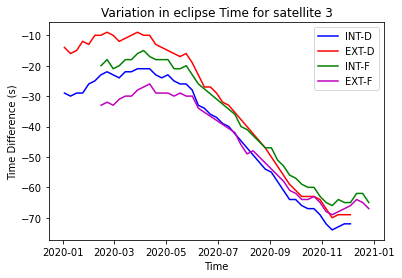

In [19]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## GANYMEDE

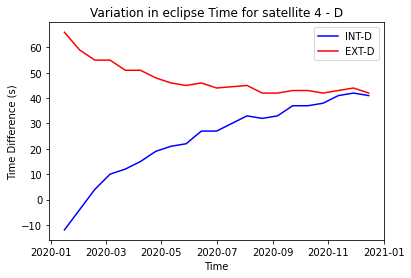

In [20]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4 - D')
plt.legend(('INT-D', 'EXT-D'))

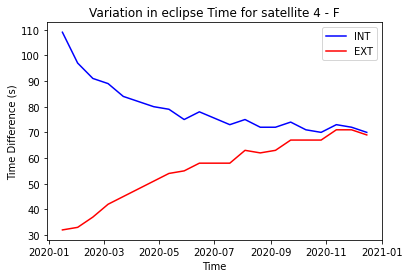

In [21]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4 - F')
plt.legend(('INT', 'EXT'))

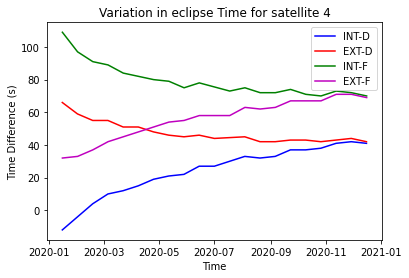

In [22]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

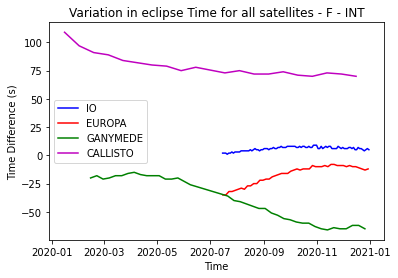

In [23]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for all satellites - F - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

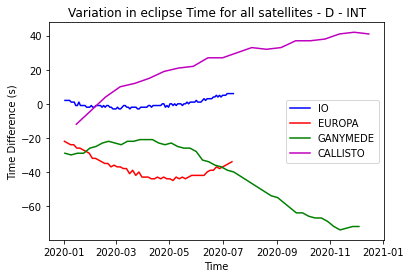

In [24]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for all satellites - D - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

# Transits

Again, greater offset with greater orbital inclination of the moon, seems to be similar to the assumpstions relating to the umbral phenomena. Is really probably correlated to the false assumption that jupiter's rotational axis is consideres to  be perpendicuilar thowards Earth. The greater error in the second section of the curve is probably correlated to the difference in our currently implemented model, which does not consider the phase of Jupiter. 

Strikingy logically, one can see the moment in which Jupiter gets perspectivelly overrun by earth, thus the side with a phase changes.

The curves for the begiining and ending of the phenomena are of course inverted, as the phase on different perspective sides must be taken into accoutn respectively.

The fact that the variation for the side of jupiter not interested by the pahse seems to be yearly points thowards the last hypothesis.

Not condisering the pahse correction gives a sin-artifact with higher amplitude

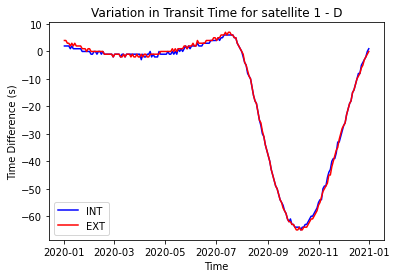

In [25]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

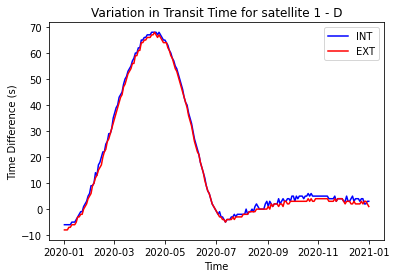

In [26]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

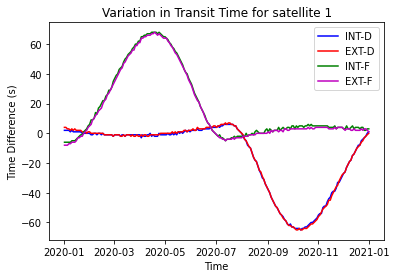

In [27]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## EUROPA

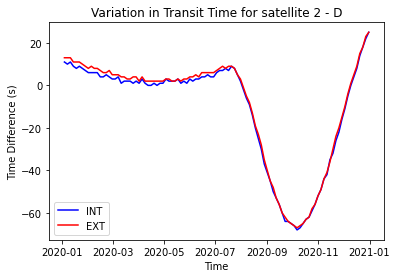

In [28]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2 - D')
plt.legend(('INT', 'EXT'))

For Io and Europa there is roughly a sin-function decribing their yearly variations with different pahase, amplitiude and frequency. The error seems to increase with an increasing incliation of the satellite's orbital plane if compared to the Jovian ecliptic, indicating that the error source might indeed be not having considered Jupiter's rotational axis inclination with regard to the jovian ecliptic.

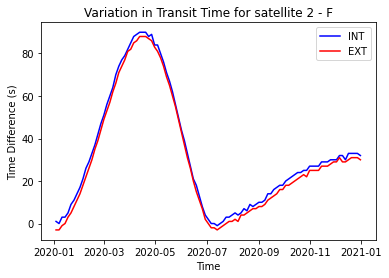

In [29]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2 - F')
plt.legend(('INT', 'EXT'))

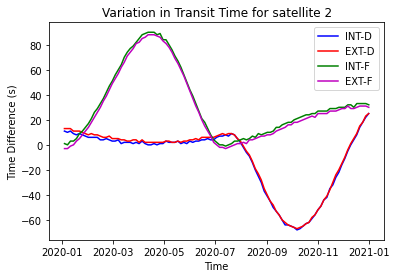

In [30]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## CALLISTO

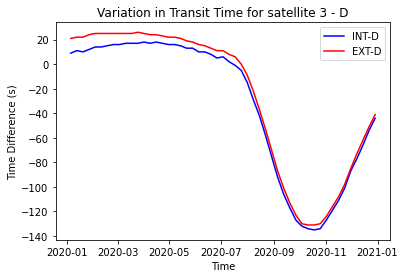

In [31]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3 - D')
plt.legend(('INT-D', 'EXT-D'))

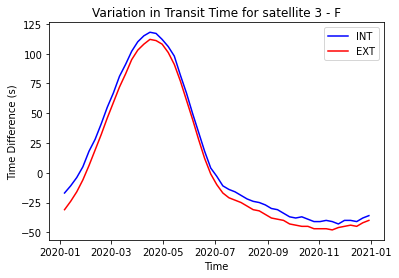

In [32]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3 - F')
plt.legend(('INT', 'EXT'))

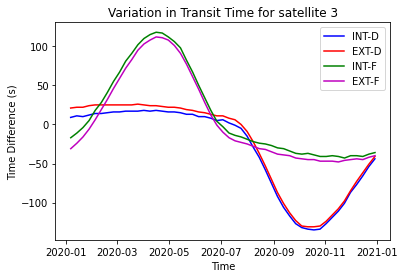

In [33]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## GANYMEDE

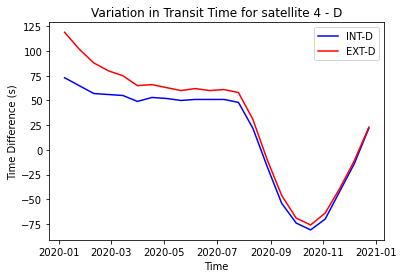

In [34]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4 - D')
plt.legend(('INT-D', 'EXT-D'))

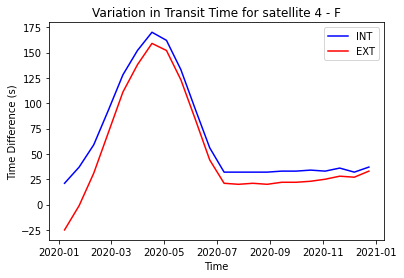

In [35]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4 - F')
plt.legend(('INT', 'EXT'))

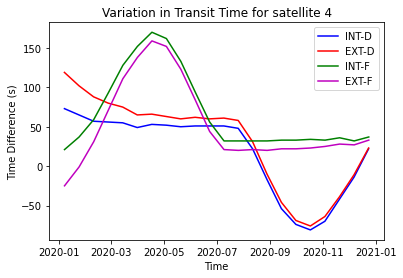

In [36]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

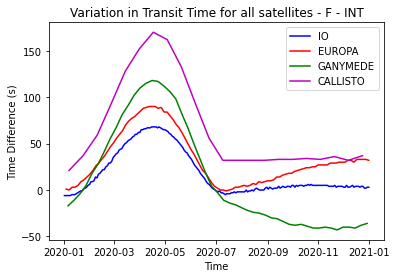

In [37]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for all satellites - F - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

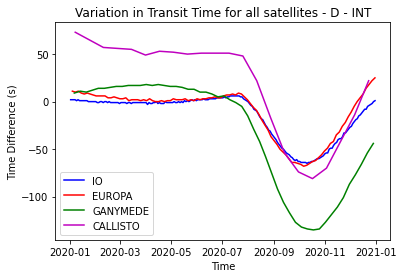

In [38]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for all satellites - D - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

# Transit of the Umbra

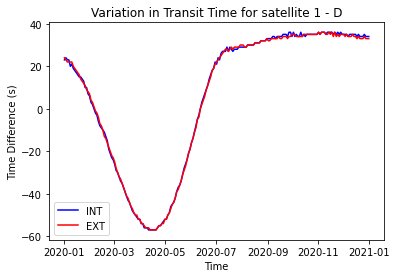

In [39]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

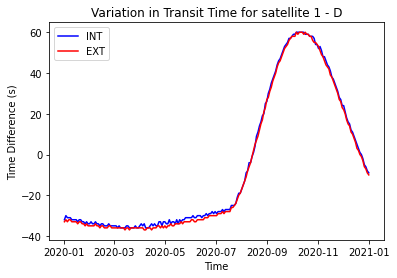

In [40]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

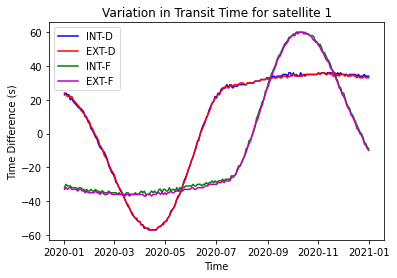

In [41]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## EUROPA

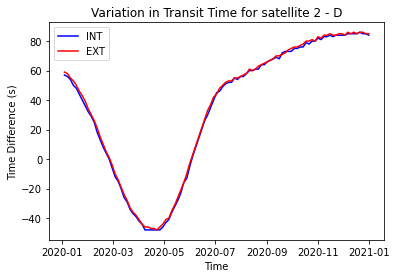

In [42]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2 - D')
plt.legend(('INT', 'EXT'))

For Io and Europa there is roughly a sin-function decribing their yearly variations with different pahase, amplitiude and frequency. The error seems to increase with an increasing incliation of the satellite's orbital plane if compared to the Jovian ecliptic, indicating that the error source might indeed be not having considered Jupiter's rotational axis inclination with regard to the jovian ecliptic.

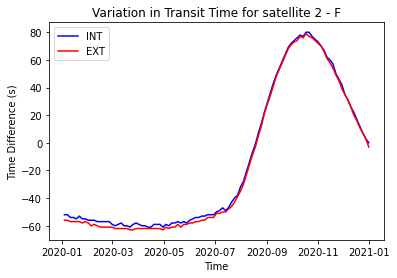

In [43]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2 - F')
plt.legend(('INT', 'EXT'))

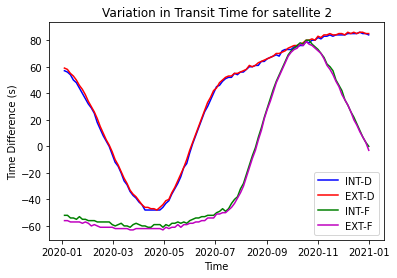

In [44]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## CALLISTO

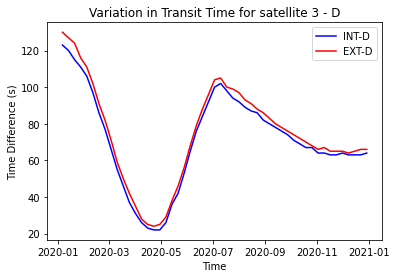

In [45]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3 - D')
plt.legend(('INT-D', 'EXT-D'))

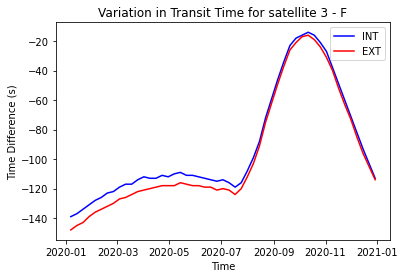

In [46]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3 - F')
plt.legend(('INT', 'EXT'))

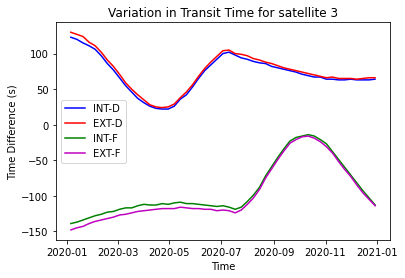

In [47]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## GANYMEDE

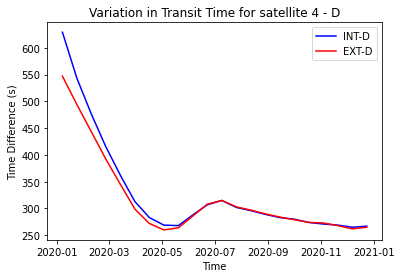

In [48]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4 - D')
plt.legend(('INT-D', 'EXT-D'))

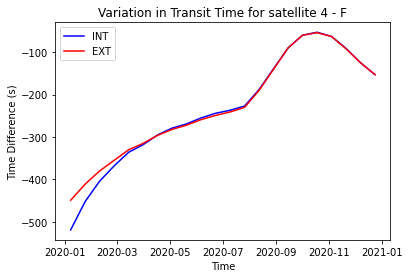

In [49]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4 - F')
plt.legend(('INT', 'EXT'))

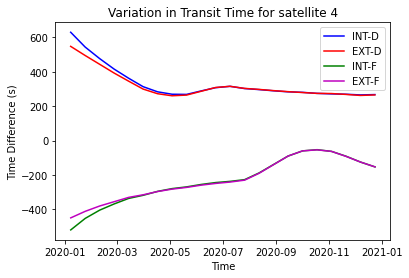

In [50]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

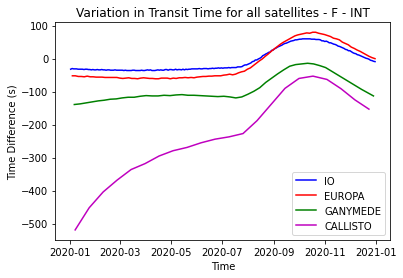

In [51]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for all satellites - F - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

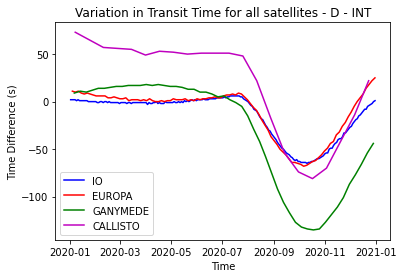

In [52]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for all satellites - D - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

The artifact deriving from not considering Jupter's pahse is also present, of course coherent to the last (F, D) since the same side of Jupiter is intested by the corssing phenomena and the transit phenomena. 

The correlation of the absolute value of the variation with regard to the orbital inclination is also present.

# Occultations

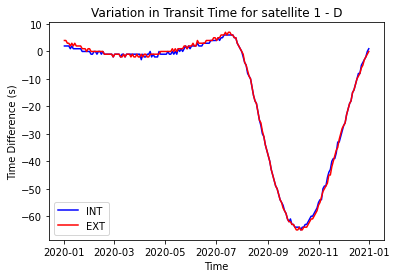

In [53]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

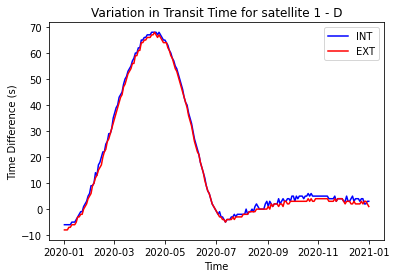

In [54]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

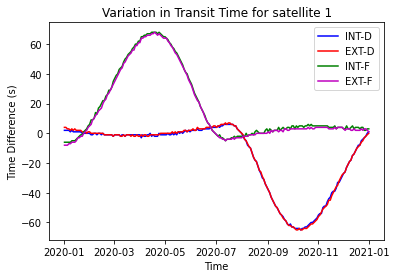

In [55]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 1')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## EUROPA

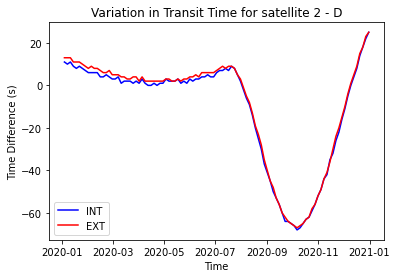

In [56]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2 - D')
plt.legend(('INT', 'EXT'))

For Io and Europa there is roughly a sin-function decribing their yearly variations with different pahase, amplitiude and frequency. The error seems to increase with an increasing incliation of the satellite's orbital plane if compared to the Jovian ecliptic, indicating that the error source might indeed be not having considered Jupiter's rotational axis inclination with regard to the jovian ecliptic.

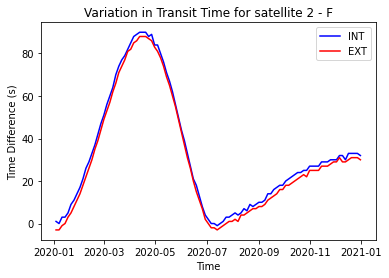

In [57]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2 - F')
plt.legend(('INT', 'EXT'))

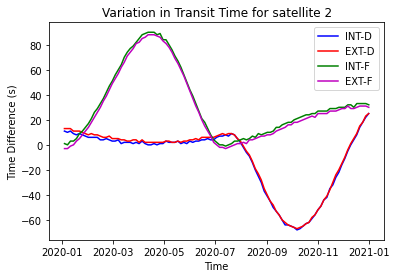

In [58]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 2')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## CALLISTO

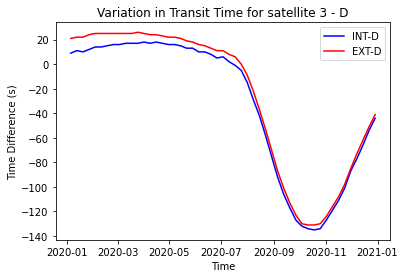

In [59]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3 - D')
plt.legend(('INT-D', 'EXT-D'))

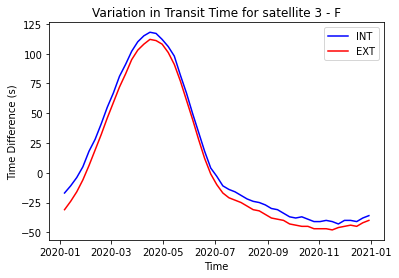

In [60]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3 - F')
plt.legend(('INT', 'EXT'))

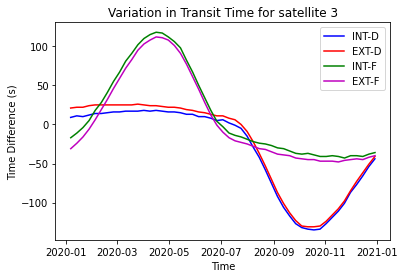

In [61]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 3')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## GANYMEDE

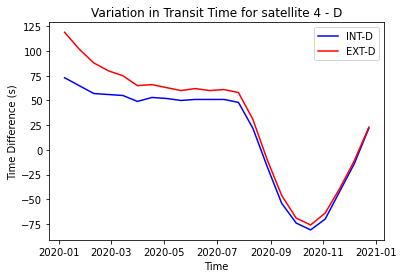

In [62]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4 - D')
plt.legend(('INT-D', 'EXT-D'))

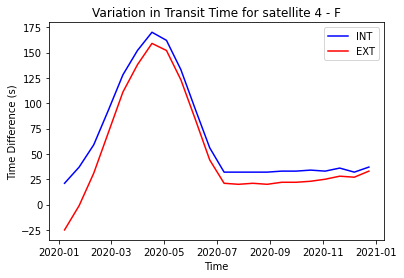

In [63]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4 - F')
plt.legend(('INT', 'EXT'))

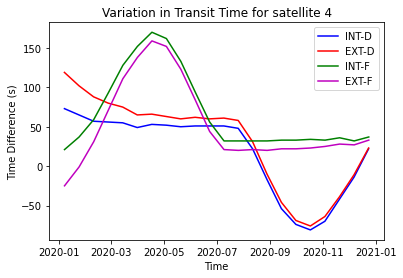

In [64]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for satellite 4')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

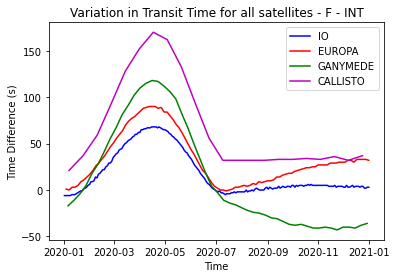

In [65]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for all satellites - F - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

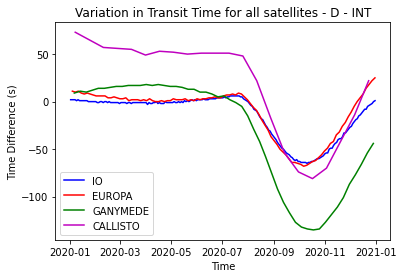

In [66]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Transit Time for all satellites - D - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

# Transit of the Umbra

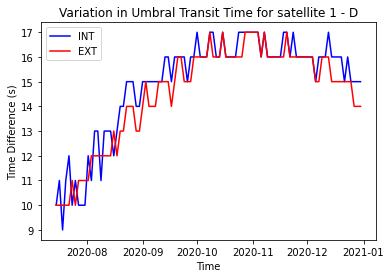

In [67]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

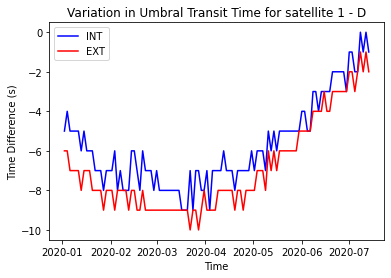

In [68]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

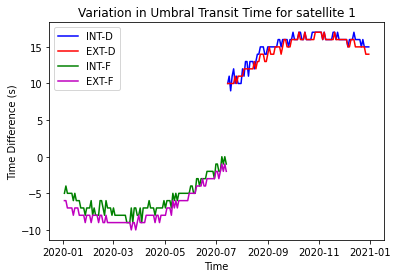

In [69]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 1')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## EUROPA

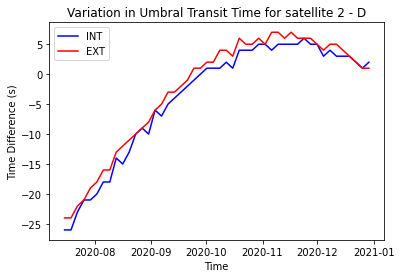

In [70]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 2 - D')
plt.legend(('INT', 'EXT'))

For Io and Europa there is roughly a sin-function decribing their yearly variations with different pahase, amplitiude and frequency. The error seems to increase with an increasing incliation of the satellite's orbital plane if compared to the Jovian ecliptic, indicating that the error source might indeed be not having considered Jupiter's rotational axis inclination with regard to the jovian ecliptic.

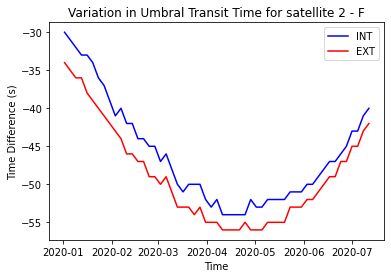

In [71]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 2 - F')
plt.legend(('INT', 'EXT'))

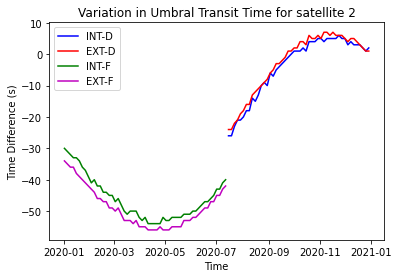

In [72]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 2')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## CALLISTO

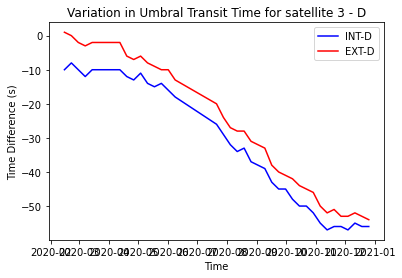

In [73]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 3 - D')
plt.legend(('INT-D', 'EXT-D'))

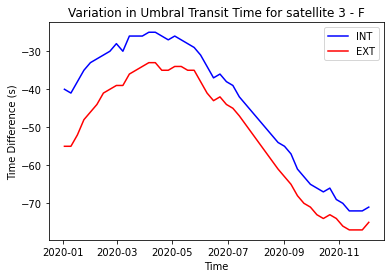

In [74]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 3 - F')
plt.legend(('INT', 'EXT'))

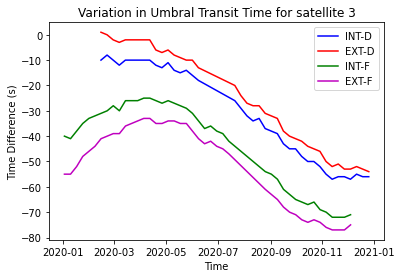

In [75]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 3')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## GANYMEDE

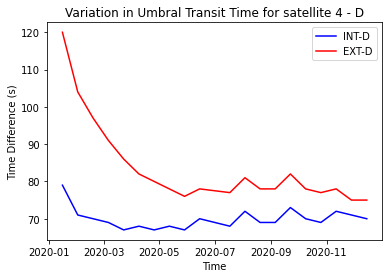

In [76]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 4 - D')
plt.legend(('INT-D', 'EXT-D'))

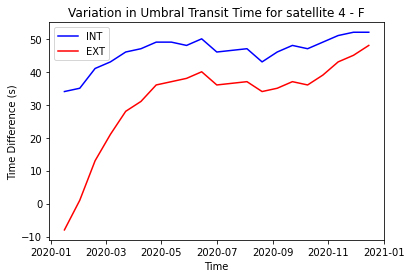

In [77]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 4 - F')
plt.legend(('INT', 'EXT'))

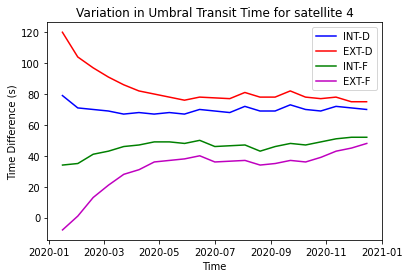

In [78]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for satellite 4')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

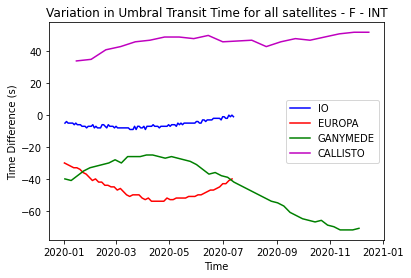

In [79]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for all satellites - F - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

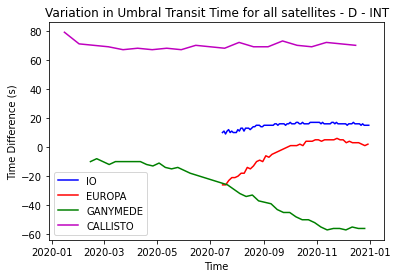

In [80]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in Umbral Transit Time for all satellites - D - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

Io and Europa exibith again a curve similar to the one considered for eclipses, the correlation of the abs() ob the variation to the orbital inclination of the satellite is also present. No further artifact due to a missing phase correction since it is not required.